In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

from sklearn.feature_selection import mutual_info_classif
import time
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import manifold, neighbors
import ast
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
from scipy.stats import norm

In [263]:
data = pd.read_csv('index.csv')

In [258]:
data

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...
899,2016,12,14,NaN,0.75,0.50,NaN,NaN,NaN,NaN
900,2017,1,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3
901,2017,2,1,NaN,0.75,0.50,0.66,NaN,4.7,2.2
902,2017,3,1,NaN,0.75,0.50,NaN,NaN,NaN,NaN


In [259]:
original_data = data.copy()
original_data

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...
899,2016,12,14,NaN,0.75,0.50,NaN,NaN,NaN,NaN
900,2017,1,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3
901,2017,2,1,NaN,0.75,0.50,0.66,NaN,4.7,2.2
902,2017,3,1,NaN,0.75,0.50,NaN,NaN,NaN,NaN


## Preparing the data for Exploration

In [210]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,904.0,1986.680310,17.172843,1954.00,1973.0000,1987.50,2001.000,2017.00
Month,904.0,6.598451,3.471963,1.00,4.0000,7.00,10.000,12.00
Day,904.0,3.598451,6.791079,1.00,1.0000,1.00,1.000,31.00
Federal Funds Target Rate,462.0,5.658415,2.553891,1.00,3.7500,5.50,7.750,11.50
Federal Funds Upper Target,103.0,0.308252,0.140917,0.25,0.2500,0.25,0.250,1.00
Federal Funds Lower Target,103.0,0.058252,0.140917,0.00,0.0000,0.00,0.000,0.75
Effective Federal Funds Rate,752.0,4.910997,3.611431,0.07,2.4275,4.70,6.580,19.10
Real GDP (Percent Change),250.0,3.138000,3.598521,-10.00,1.4000,3.10,4.875,16.50
Unemployment Rate,752.0,5.979122,1.567641,3.40,4.9000,5.70,7.000,10.80
Inflation Rate,710.0,3.733380,2.573637,0.60,2.0000,2.80,4.700,13.60


In [267]:
num_rows = data.shape[0]
num_cols = data.shape[1]
print("number of rows/entries:", num_rows )
print("number of columns", num_cols)

number of rows/entries: 904
number of columns 10


In [268]:
null_val_sums1 = data.isnull().sum()
duplicate1 = data[data.duplicated()].shape[0]
pd.DataFrame({"Column": null_val_sums1.index, "Number of Null Values": null_val_sums1.values,
              "Number of Duplicate Values":duplicate1, "Proportion": null_val_sums1.values / len(data), "Data Type": data.dtypes })

,Column,Number of Null Values,Number of Duplicate Values,Proportion,Data Type
Year,Year,0,0,0.000000,int64
Month,Month,0,0,0.000000,int64
Day,Day,0,0,0.000000,int64
Federal Funds Target Rate,Federal Funds Target Rate,442,0,0.488938,float64
Federal Funds Upper Target,Federal Funds Upper Target,801,0,0.886062,float64
Federal Funds Lower Target,Federal Funds Lower Target,801,0,0.886062,float64
Effective Federal Funds Rate,Effective Federal Funds Rate,152,0,0.168142,float64
Real GDP (Percent Change),Real GDP (Percent Change),654,0,0.723451,float64
Unemployment Rate,Unemployment Rate,152,0,0.168142,float64
Inflation Rate,Inflation Rate,194,0,0.214602,float64


In [269]:
# replacing missing values in numerical columns with the mean
num_cols = ['Federal Funds Target Rate', 'Federal Funds Upper Target', 'Federal Funds Lower Target',
                     'Effective Federal Funds Rate', 'Real GDP (Percent Change)', 'Unemployment Rate',
                     'Inflation Rate']
for col in num_cols:
    mean = data[col].mean()
    data[col].fillna(mean, inplace=True)

In [270]:
null_val_sums1 = data.isnull().sum()
duplicate1 = data[data.duplicated()].shape[0]
pd.DataFrame({"Column": null_val_sums1.index, "Number of Null Values": null_val_sums1.values,
              "Number of Duplicate Values":duplicate1, "Proportion": null_val_sums1.values / len(data), "Data Type": data.dtypes })

,Column,Number of Null Values,Number of Duplicate Values,Proportion,Data Type
Year,Year,0,0,0.0,int64
Month,Month,0,0,0.0,int64
Day,Day,0,0,0.0,int64
Federal Funds Target Rate,Federal Funds Target Rate,0,0,0.0,float64
Federal Funds Upper Target,Federal Funds Upper Target,0,0,0.0,float64
Federal Funds Lower Target,Federal Funds Lower Target,0,0,0.0,float64
Effective Federal Funds Rate,Effective Federal Funds Rate,0,0,0.0,float64
Real GDP (Percent Change),Real GDP (Percent Change),0,0,0.0,float64
Unemployment Rate,Unemployment Rate,0,0,0.0,float64
Inflation Rate,Inflation Rate,0,0,0.0,float64


C:\Users\phiez\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


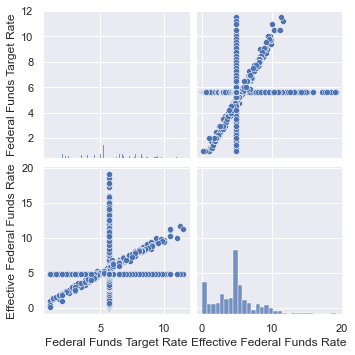

In [271]:
sns.set()
cols = ['Federal Funds Target Rate',
                     'Effective Federal Funds Rate']
sns.pairplot(data[cols], size = 2.5)
plt.show();
warnings.simplefilter(action='ignore', category=FutureWarning)

## Finding The Strong Correlated columns

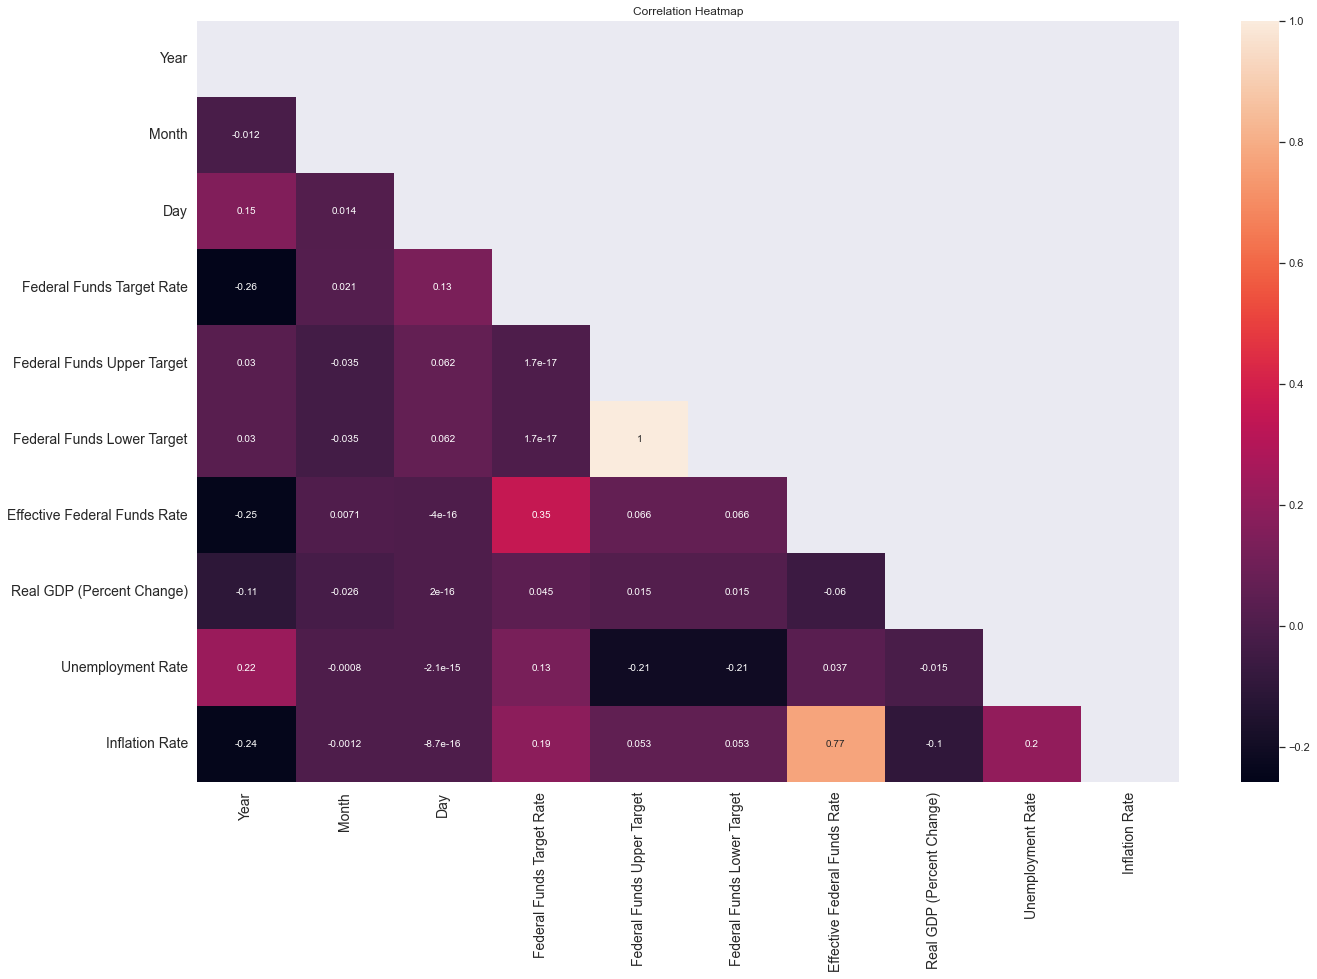

In [272]:
mask = np.zeros_like(data.corr()) # Create a maske for heatmap
triangle_indeces=np.triu_indices_from(mask) # arranging the mask variables in triagular shape
mask[triangle_indeces] =True
mask
plt.figure(figsize=(22,14))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Correlation Heatmap")
plt.show()

In [273]:
def find_n_strong_correlations(df, threshold=0.8, n=5):
    corr_matrix = df.corr().abs() 
    np.fill_diagonal(corr_matrix.values, 0)
    flattened_corr = corr_matrix.unstack().sort_values(ascending=False)
    strong_correlations = []
    i = 0
    while len(strong_correlations) < n and i < len(flattened_corr):
        correlation = flattened_corr[i]
        if correlation >= threshold:
            strong_correlations.append(flattened_corr.index[i])
        i += 1
    
    return strong_correlations
strong_correlations = find_n_strong_correlations(data, threshold=0.8, n=10)
for pair in strong_correlations:
    print(pair)

('Federal Funds Upper Target', 'Federal Funds Lower Target')
('Federal Funds Lower Target', 'Federal Funds Upper Target')


## Checking for skewness of all relevant features

In [220]:
#skewness and kurtosis 'Federal Funds Target Rate', 'Federal Funds Upper Target', 'Federal Funds Lower Target',
                     'Effective Federal Funds Rate', 'Real GDP (Percent Change)', 'Unemployment Rate',
                     'Inflation Rate']

IndentationError: unexpected indent (2669751735.py, line 2)

Skewness: 0.037921
Kurtosis: 1.457849


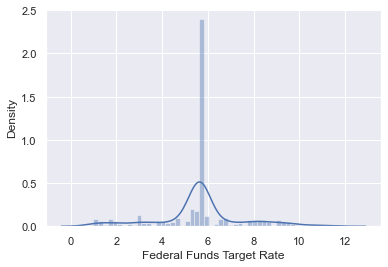

In [274]:
sns.distplot(data['Federal Funds Target Rate']);
print("Skewness: %f" % data['Federal Funds Target Rate'].skew())
print("Kurtosis: %f" % data['Federal Funds Target Rate'].kurt())
warnings.simplefilter(action='ignore', category=FutureWarning)

Skewness: 7.842636
Kurtosis: 85.585340


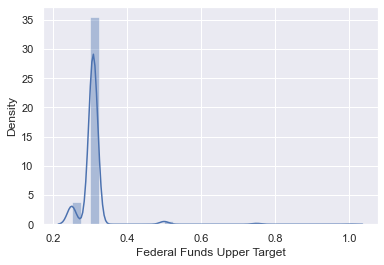

In [275]:
sns.distplot(data['Federal Funds Upper Target']);
print("Skewness: %f" % data['Federal Funds Upper Target'].skew())
print("Kurtosis: %f" % data['Federal Funds Upper Target'].kurt())
warnings.simplefilter(action='ignore', category=FutureWarning)

Skewness: 7.842636
Kurtosis: 85.585340


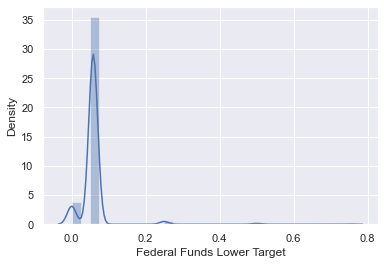

In [276]:
sns.distplot(data['Federal Funds Lower Target']);
print("Skewness: %f" % data['Federal Funds Lower Target'].skew())
print("Kurtosis: %f" % data['Federal Funds Lower Target'].kurt())
warnings.simplefilter(action='ignore', category=FutureWarning)

Skewness: 1.098779
Kurtosis: 2.403122


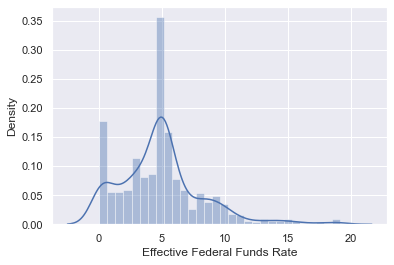

In [277]:
sns.distplot(data['Effective Federal Funds Rate']);
print("Skewness: %f" % data['Effective Federal Funds Rate'].skew())
print("Kurtosis: %f" % data['Effective Federal Funds Rate'].kurt())
warnings.simplefilter(action='ignore', category=FutureWarning)

Skewness: -0.375453
Kurtosis: 13.213582


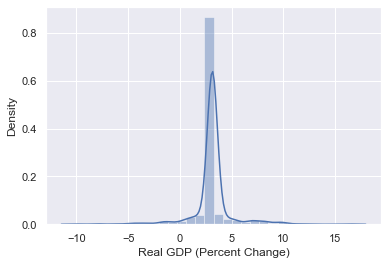

In [278]:
sns.distplot(data['Real GDP (Percent Change)']);
print("Skewness: %f" % data['Real GDP (Percent Change)'].skew())
print("Kurtosis: %f" % data['Real GDP (Percent Change)'].kurt())
warnings.simplefilter(action='ignore', category=FutureWarning)

Skewness: 0.802889
Kurtosis: 0.736697


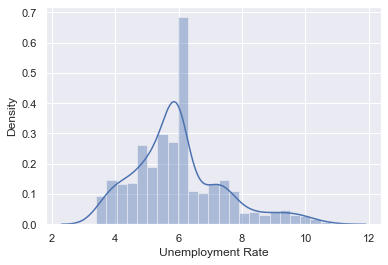

In [279]:
sns.distplot(data['Unemployment Rate']);
print("Skewness: %f" % data['Unemployment Rate'].skew())
print("Kurtosis: %f" % data['Unemployment Rate'].kurt())
warnings.simplefilter(action='ignore', category=FutureWarning)

Skewness: 1.781868
Kurtosis: 3.660780


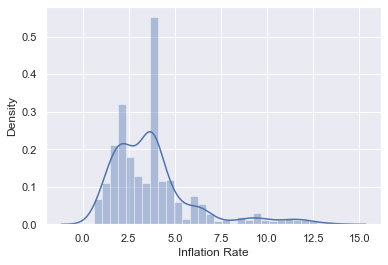

In [280]:
sns.distplot(data['Inflation Rate']);
print("Skewness: %f" % data['Inflation Rate'].skew())
print("Kurtosis: %f" % data['Inflation Rate'].kurt())
warnings.simplefilter(action='ignore', category=FutureWarning)

In [281]:
 'Federal Funds Target Rate', 'Federal Funds Upper Target', 'Federal Funds Lower Target',
                     'Effective Federal Funds Rate', 'Real GDP (Percent Change)', 'Unemployment Rate',
                     'Inflation Rate']

IndentationError: unexpected indent (19274957.py, line 2)

## Outlier detection, visualization and treatment using Z_score method:

In [282]:
def z_score_identifier(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good

z-score of 2 corresponds to a prob of 0.27%
Rejection 99 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 5 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


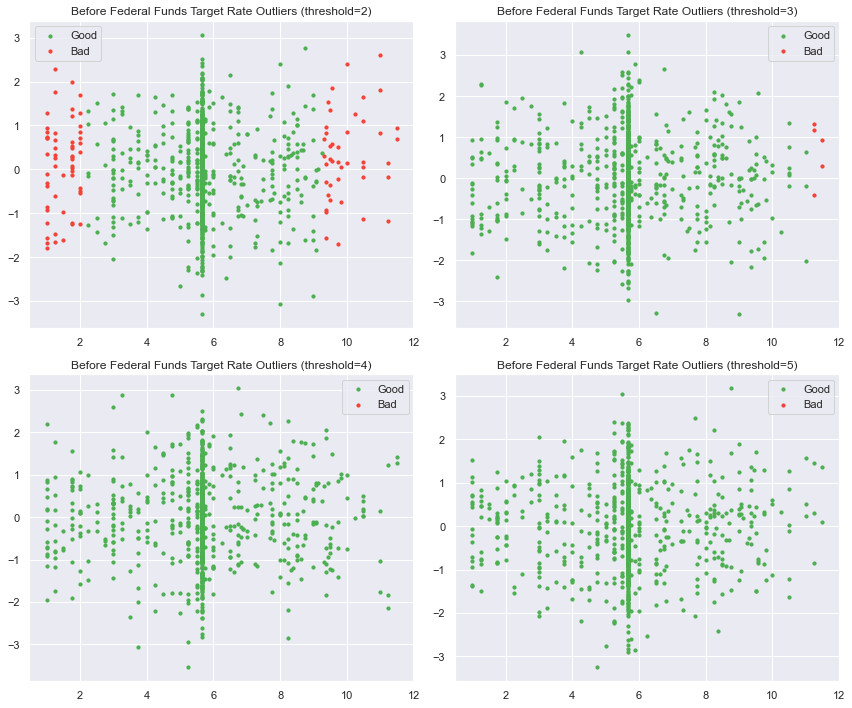

In [283]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score_identifier(data['Federal Funds Target Rate'], threshold=threshold)
    plt.scatter(data['Federal Funds Target Rate'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['Federal Funds Target Rate'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Before Federal Funds Target Rate Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 18 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 18 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 18 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 5 points


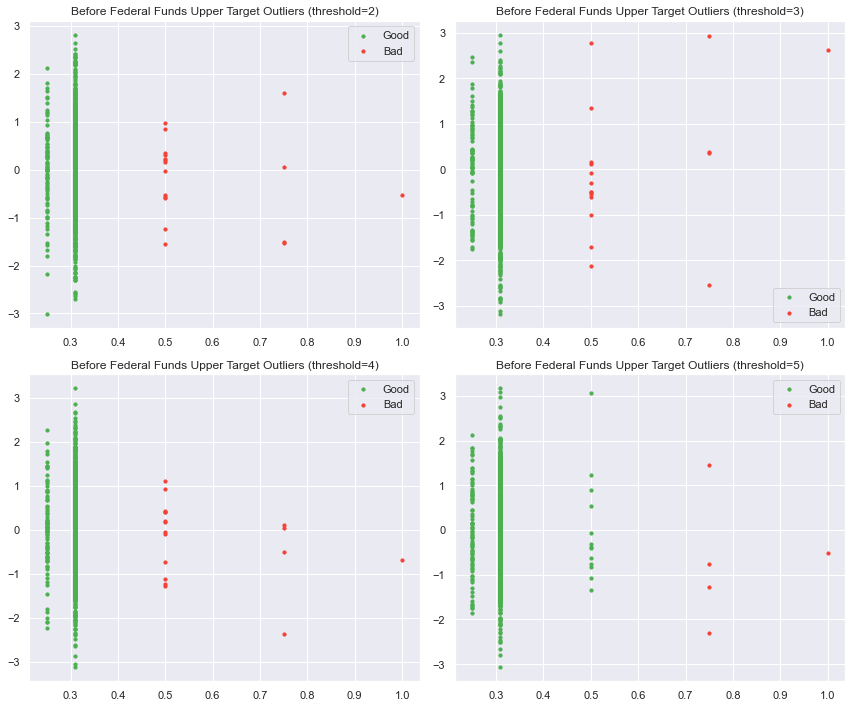

In [284]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score_identifier(data['Federal Funds Upper Target'], threshold=threshold)
    plt.scatter(data['Federal Funds Upper Target'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['Federal Funds Upper Target'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Before Federal Funds Upper Target Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 18 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 18 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 18 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 5 points


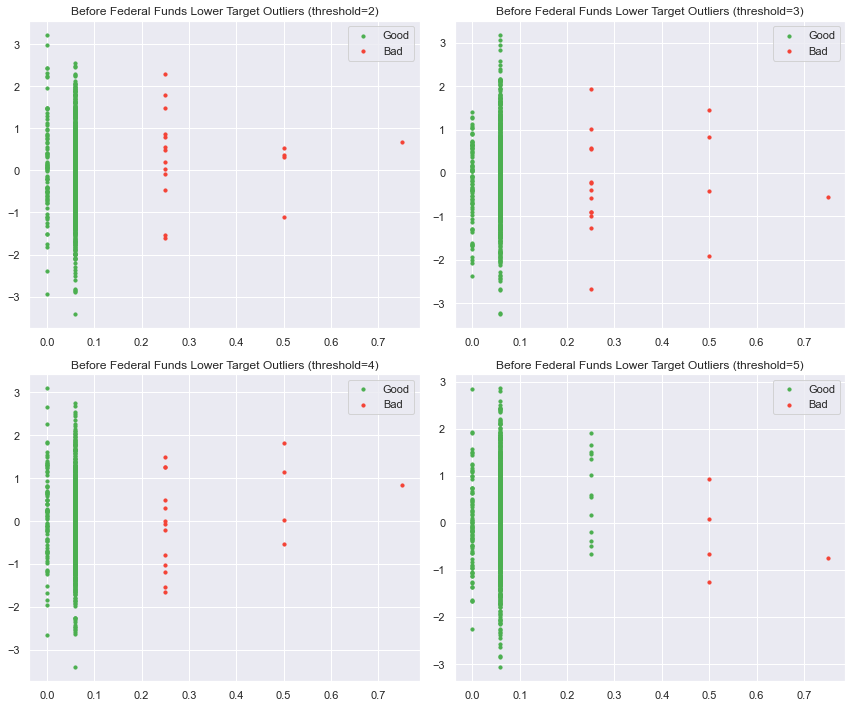

In [285]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score_identifier(data['Federal Funds Lower Target'], threshold=threshold)
    plt.scatter(data['Federal Funds Lower Target'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['Federal Funds Lower Target'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Before Federal Funds Lower Target Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 33 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 14 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 5 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


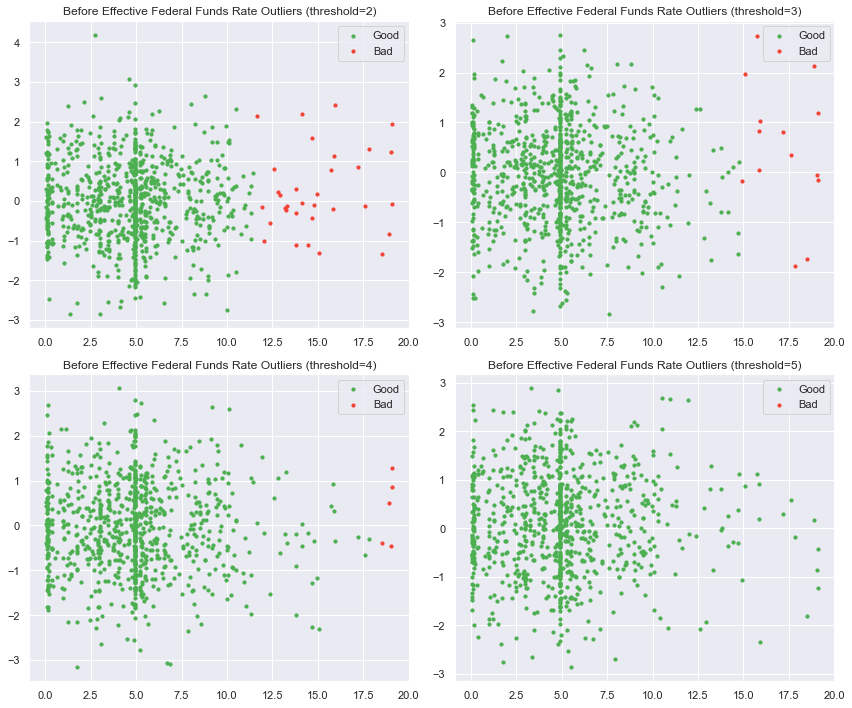

In [286]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score_identifier(data['Effective Federal Funds Rate'], threshold=threshold)
    plt.scatter(data['Effective Federal Funds Rate'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['Effective Federal Funds Rate'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Before Effective Federal Funds Rate Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 65 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 30 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 11 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 5 points


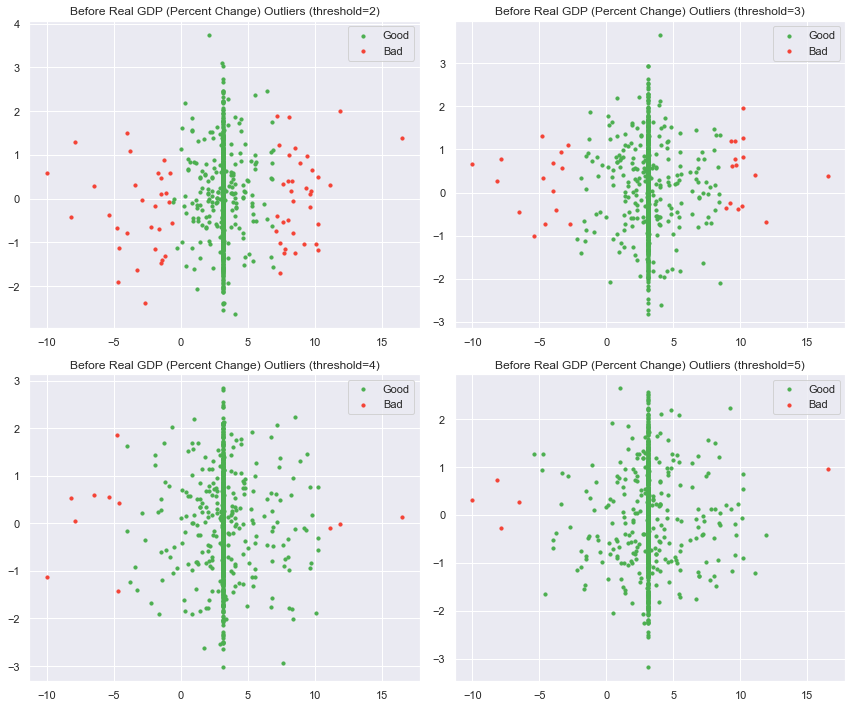

In [287]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score_identifier(data['Real GDP (Percent Change)'], threshold=threshold)
    plt.scatter(data['Real GDP (Percent Change)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['Real GDP (Percent Change)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Before Real GDP (Percent Change) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 51 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 6 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


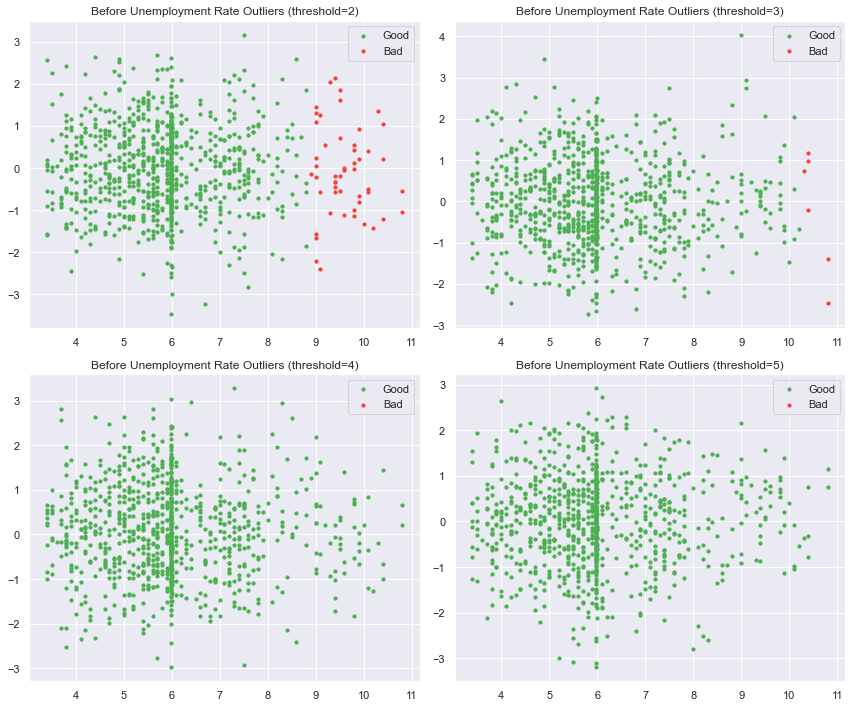

In [288]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score_identifier(data['Unemployment Rate'], threshold=threshold)
    plt.scatter(data['Unemployment Rate'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['Unemployment Rate'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Before Unemployment Rate Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 58 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 27 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 3 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


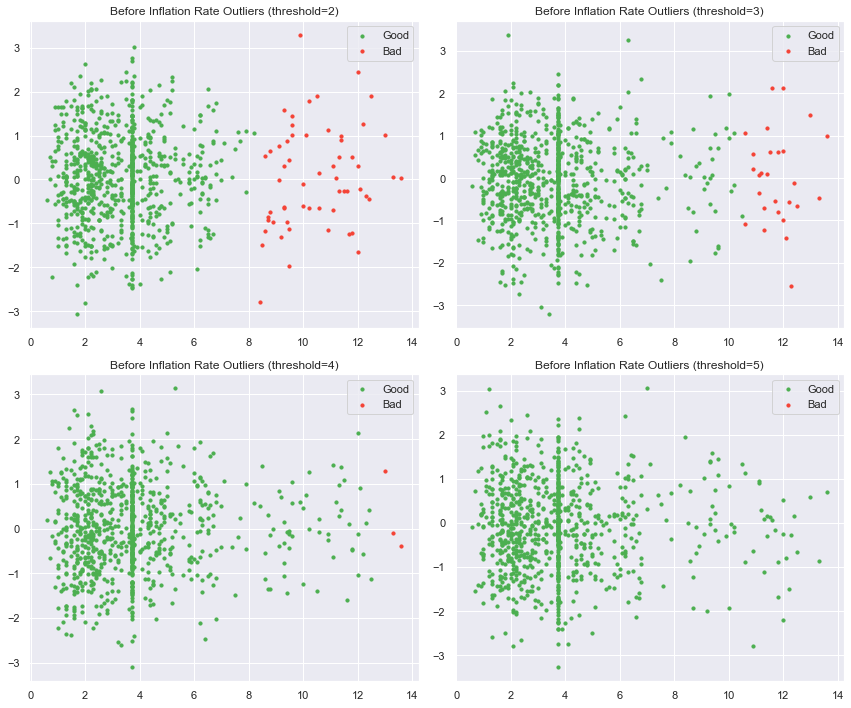

In [289]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score_identifier(data['Inflation Rate'], threshold=threshold)
    plt.scatter(data['Inflation Rate'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['Inflation Rate'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Before Inflation Rate Outliers (threshold={threshold})")

plt.tight_layout()

In [290]:
def removing_outliers(df, threshold=3):
    df_cleaned = df.copy()
    for column in df_cleaned.columns:
        if df_cleaned[column].dtype != 'object':
            z_scores = np.abs((df_cleaned[column] - df_cleaned[column].mean()) / df_cleaned[column].std())
            outliers = z_scores > threshold
            df_cleaned = df_cleaned[~outliers]
    df_cleaned.reset_index(drop=True, inplace=True)
    return df_cleaned

In [291]:
data = removing_outliers(data, threshold=2)
data

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,5.658415,0.308252,0.058252,0.800000,4.600,5.800000,3.73338
1,1954,8,1,5.658415,0.308252,0.058252,1.220000,3.138,6.000000,3.73338
2,1954,9,1,5.658415,0.308252,0.058252,1.060000,3.138,6.100000,3.73338
3,1954,11,1,5.658415,0.308252,0.058252,0.830000,3.138,5.300000,3.73338
4,1954,12,1,5.658415,0.308252,0.058252,1.280000,3.138,5.000000,3.73338
...,...,...,...,...,...,...,...,...,...,...
517,2007,12,1,4.500000,0.308252,0.058252,4.240000,3.138,5.000000,2.40000
518,2007,12,11,4.250000,0.308252,0.058252,4.910997,3.138,5.979122,3.73338
519,2008,2,1,3.000000,0.308252,0.058252,2.980000,3.138,4.900000,2.30000
520,2008,3,1,3.000000,0.308252,0.058252,2.610000,3.138,5.100000,2.40000


z-score of 2 corresponds to a prob of 0.27%
Rejection 61 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


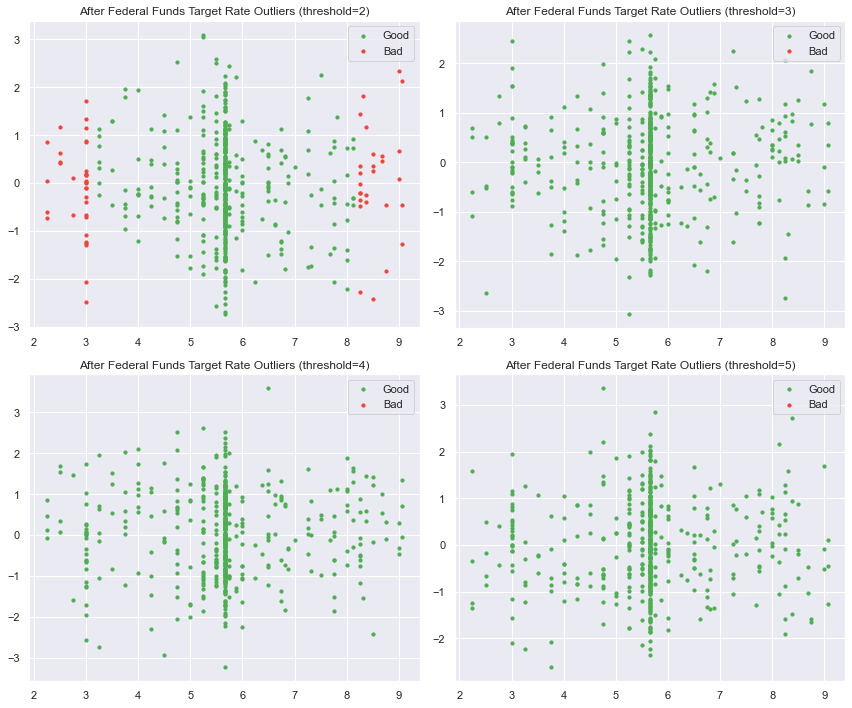

In [292]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score_identifier(data['Federal Funds Target Rate'], threshold=threshold)
    plt.scatter(data['Federal Funds Target Rate'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['Federal Funds Target Rate'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"After Federal Funds Target Rate Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


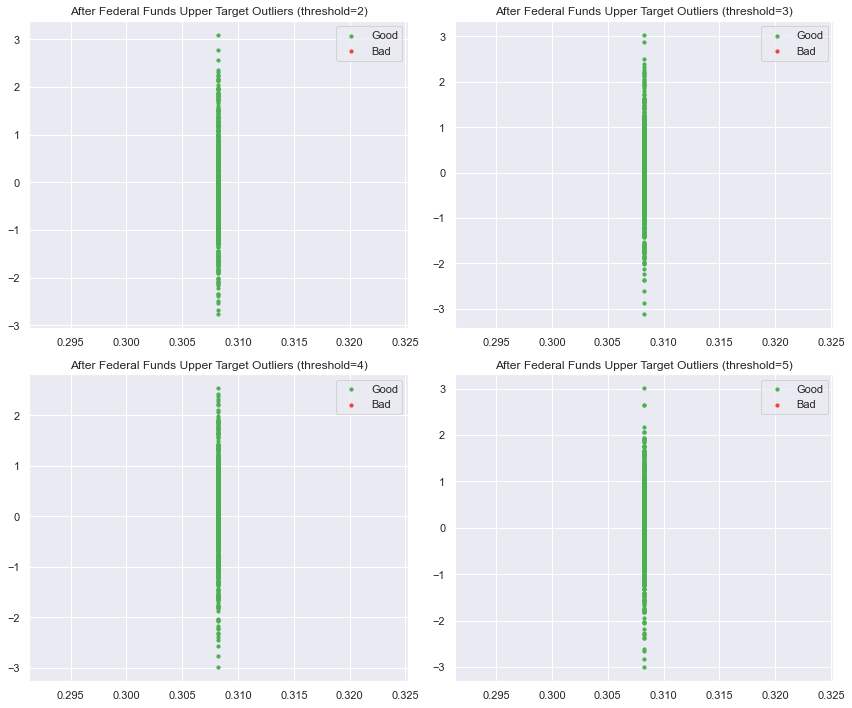

In [293]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score_identifier(data['Federal Funds Upper Target'], threshold=threshold)
    plt.scatter(data['Federal Funds Upper Target'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['Federal Funds Upper Target'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"After Federal Funds Upper Target Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


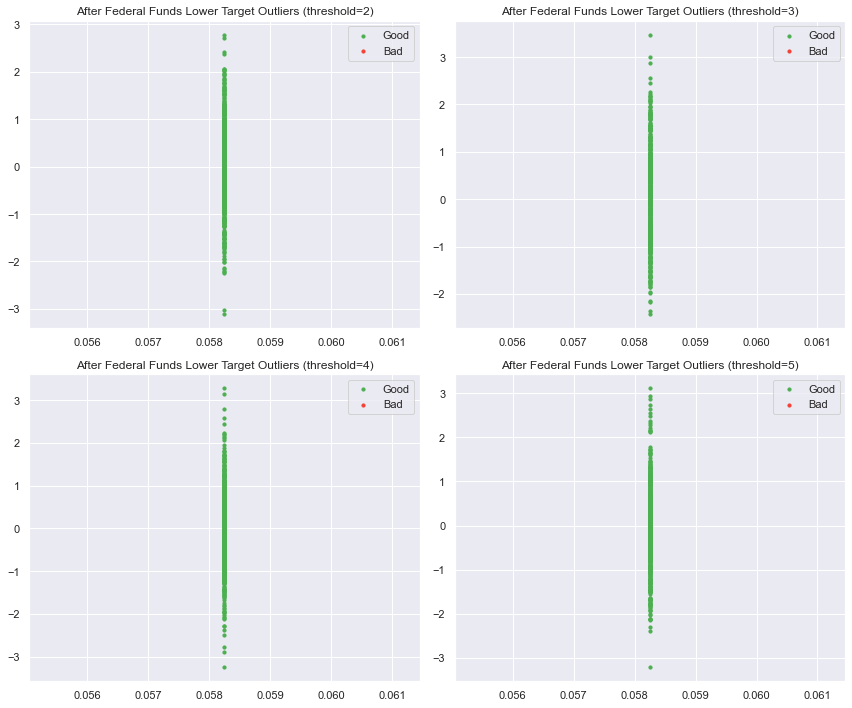

In [294]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score_identifier(data['Federal Funds Lower Target'], threshold=threshold)
    plt.scatter(data['Federal Funds Lower Target'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['Federal Funds Lower Target'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"After Federal Funds Lower Target Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 25 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 2 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


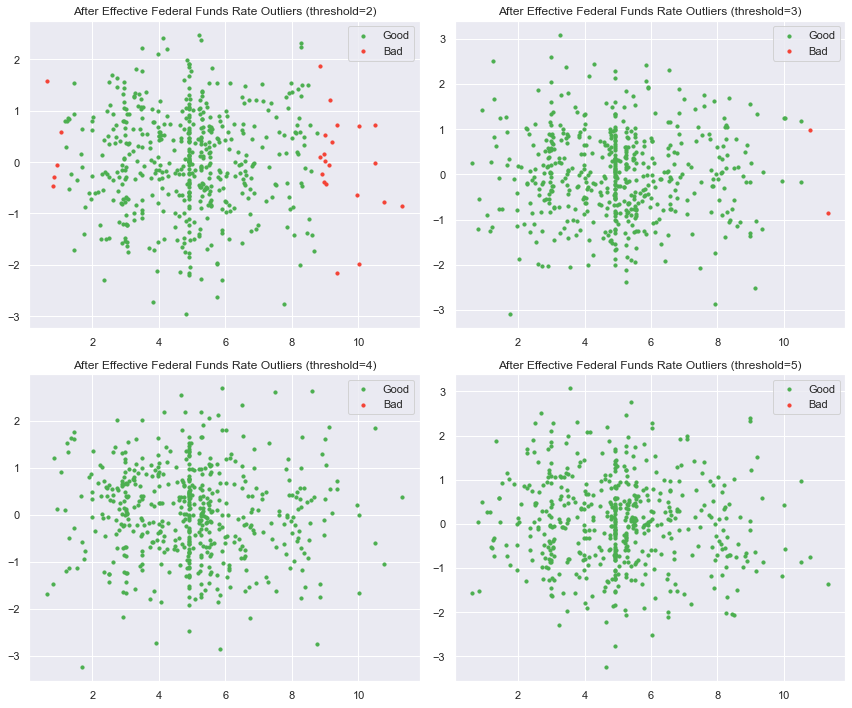

In [295]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score_identifier(data['Effective Federal Funds Rate'], threshold=threshold)
    plt.scatter(data['Effective Federal Funds Rate'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['Effective Federal Funds Rate'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"After Effective Federal Funds Rate Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 45 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 18 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 9 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


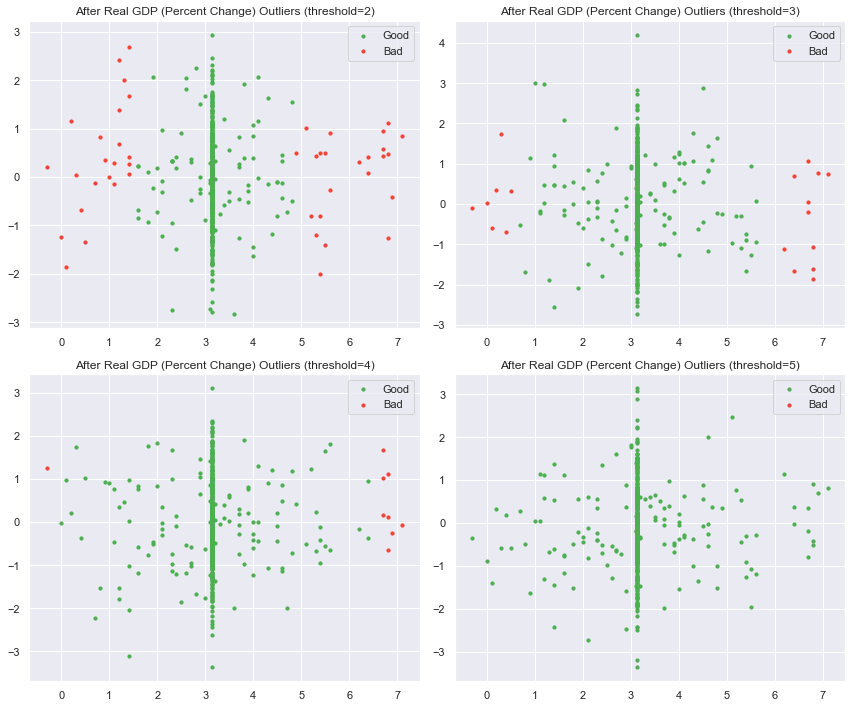

In [296]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score_identifier(data['Real GDP (Percent Change)'], threshold=threshold)
    plt.scatter(data['Real GDP (Percent Change)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['Real GDP (Percent Change)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"After Real GDP (Percent Change) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 10 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


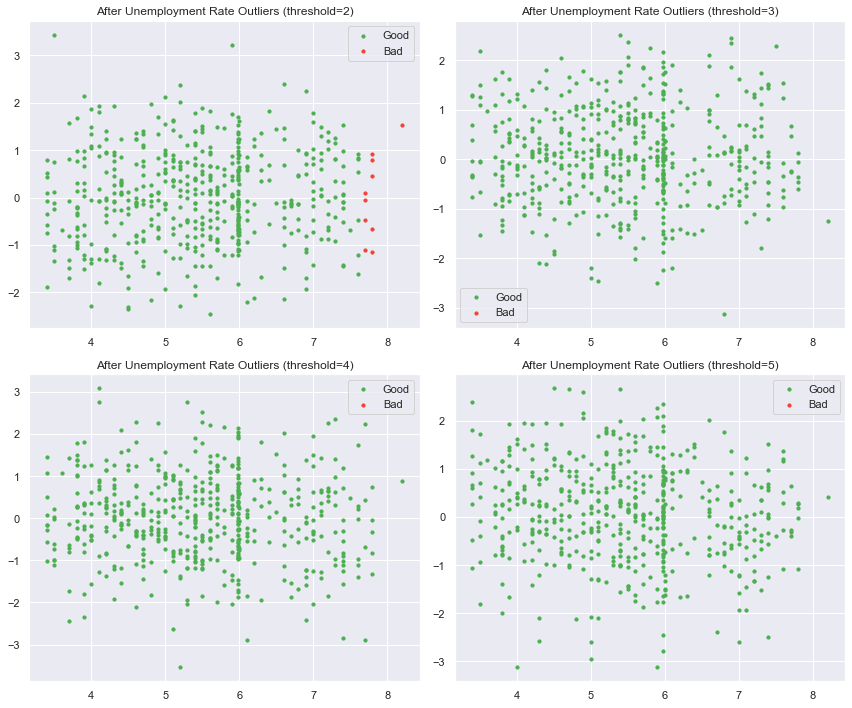

In [297]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score_identifier(data['Unemployment Rate'], threshold=threshold)
    plt.scatter(data['Unemployment Rate'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['Unemployment Rate'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"After Unemployment Rate Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 26 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


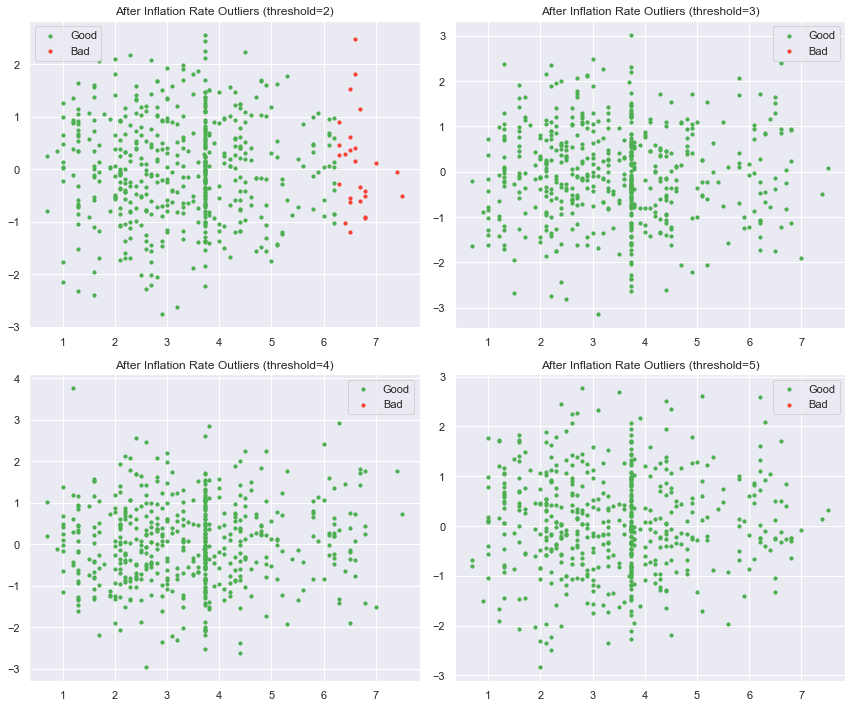

In [298]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score_identifier(data['Inflation Rate'], threshold=threshold)
    plt.scatter(data['Inflation Rate'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['Inflation Rate'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"After Inflation Rate Outliers (threshold={threshold})")

plt.tight_layout()

## Modelling 

In [299]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.models import Sequential
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

In [300]:
data = data.drop(['Year', 'Month', 'Day'], axis=1)

In [301]:
X=data.drop(['Effective Federal Funds Rate'],axis=1)
y = data[['Effective Federal Funds Rate']]

### Performing feature scaling

In [302]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### Split the data into train, test, and validation sets

In [303]:
X_train_val, X_test, y_train_val, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

### The most important factors that impact Effective Federal Funds Rate?

In [304]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X, y)

feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
warnings.simplefilter(action='ignore', category=FutureWarning)

                      Feature  Importance
5              Inflation Rate    0.607929
4           Unemployment Rate    0.212601
0   Federal Funds Target Rate    0.170166
3   Real GDP (Percent Change)    0.009304
1  Federal Funds Upper Target    0.000000
2  Federal Funds Lower Target    0.000000


C:\Users\phiez\AppData\Local\Temp\ipykernel_30600\2330148563.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


Question: Would a date(year, month, day) have any effect on the prediction result?

### What effect do the Inflation Rate, Federal Funds Target Rate, Unemployment Rate and Real GDP (Percent Change) have on the power generated?

In [305]:
import statsmodels.api as sm

features = ['Inflation Rate', 'Federal Funds Target Rate', 'Unemployment Rate', 'Real GDP (Percent Change)']

target = 'Effective Federal Funds Rate' 

X = data[features]
X = pd.get_dummies(X)

X = sm.add_constant(X)

y = data[target]

model = sm.OLS(y, X)
results = model.fit()

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': results.params})
print(coefficients)

print(results.summary())

                                             Feature  Coefficient
const                                          const     1.445436
Inflation Rate                        Inflation Rate     0.670449
Federal Funds Target Rate  Federal Funds Target Rate     0.559040
Unemployment Rate                  Unemployment Rate    -0.315051
Real GDP (Percent Change)  Real GDP (Percent Change)    -0.059329
                                 OLS Regression Results                                 
Dep. Variable:     Effective Federal Funds Rate   R-squared:                       0.462
Model:                                      OLS   Adj. R-squared:                  0.457
Method:                           Least Squares   F-statistic:                     110.8
Date:                          Mon, 19 Jun 2023   Prob (F-statistic):           3.80e-68
Time:                                  17:10:29   Log-Likelihood:                -920.63
No. Observations:                           522   AIC:                

- The coefficient for the "Federal Funds Target Rate" is 0.5902, suggesting that a one-unit increase in the Federal Funds Target Rate is associated with an estimated increase of 0.5902 in the Effective Federal Funds Rate, assuming other variables are constant.
- Similarly, the coefficient for the "Unemployment Rate" is -0.0859, indicating that a one-unit increase in the Unemployment Rate is associated with an estimated decrease of 0.0859 in the Effective Federal Funds Rate, assuming other variables remain constant.
- The coefficient for the "Real GDP (Percent Change)" is 0.1076, suggesting a positive but relatively small association with the Effective Federal Funds Rate. However, the p-value for this coefficient is 0.560, indicating that it is not statistically significant at the conventional significance level of 0.05.
--------------------------------------------------------------------------------------------------------------------------
- The R-squared value of 0.341 indicates that approximately 34.1% of the variance in the Effective Federal Funds Rate can be explained by the independent variables included in the model.
- The adjusted R-squared value of 0.333 accounts for the number of predictors and provides a more conservative estimate of the model's explanatory power.
- The F-statistic of 43.35 with a corresponding p-value of 2.64e-29 suggests that the overall model is statistically significant, indicating that at least one of the predictors has a significant relationship with the Effective Federal Funds Rate.
--------------------------------------------------------------------------------------------------------------------------
- The Log-Likelihood value of -567.92 represents the logarithm of the likelihood function based on the model's parameters. It is often used in comparing models, where a higher value indicates a better fit.
- The Akaike Information Criterion (AIC) value of 1146 is used for model selection, where a lower value indicates a better trade-off between model complexity and goodness of fit.
- The Bayesian Information Criterion (BIC) value of 1165 is another criterion for model selection, similar to AIC.
- The Durbin-Watson statistic of 0.250 measures the presence of autocorrelation in the model's residuals. A value close to 2 suggests no significant autocorrelation, while values significantly different from 2 indicate potential autocorrelation.
- The Jarque-Bera (JB) test assesses the normality assumption of the model's residuals. The significant p-value (1.20e-09) suggests that the residuals are not normally distributed.
- The skewness and kurtosis values indicate the departure from a normal distribution of the residuals.

--------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------
    - Overall, the results suggest that the "Inflation Rate" and "Federal Funds Target Rate" have a statistically significant association with the "Effective Federal Funds Rate," while the "Unemployment Rate" and "Real GDP (Percent Change)" may not have a significant relationship in the given model.

In [318]:
X_train_val, X_test, y_train_val, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [320]:

Acc = pd.DataFrame(index=None, columns=['model', 'train', 'test', 'validation'])
regressors = [['SVR',SVR()],
              ['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['KNeighborsRegressor', KNeighborsRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['GradientBoostingRegressor',GradientBoostingRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y_train)
    tr = r2_score(y_train, model.predict(X_train))
    te = r2_score(y_test, model.predict(X_test))
    val = r2_score(y_val, model.predict(X_val))
    
    Acc = Acc.append(pd.Series({'model':name, 'train':tr,'test':te, 'validation':val}),ignore_index=True )
Acc.sort_values(by='validation')

C:\Users\phiez\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,model,train,test,validation
4,MLPRegressor,0.872955,0.903851,0.861748
0,SVR,0.975119,0.970087,0.958879
2,KNeighborsRegressor,0.956827,0.957378,0.967909
5,AdaBoostRegressor,0.994437,0.994224,0.994486
1,DecisionTreeRegressor,1.0,0.999325,0.996557
3,RandomForestRegressor,0.999702,0.99967,0.999774
6,GradientBoostingRegressor,0.999979,0.999784,0.999809


### Model Tuning

- Decision Tree Regressor parameters turning

In [308]:
DTR = DecisionTreeRegressor()
param_grid = {"criterion": ["mse", "mae"],"min_samples_split": [14, 15, 16, 17],
              "max_depth": [5, 6, 7],"min_samples_leaf": [4, 5, 6],"max_leaf_nodes": [29, 30, 31, 32],}

grid_cv_DTR = GridSearchCV(DTR, param_grid, cv=5)

grid_cv_DTR.fit(X_train,y_train)
print("R-Squared::{}".format(grid_cv_DTR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_DTR.best_params_))

R-Squared::0.9924320430385188
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 7, 'max_leaf_nodes': 29, 'min_samples_leaf': 4, 'min_samples_split': 14}


In [309]:
DTR = DecisionTreeRegressor(criterion= 'mse', max_depth= 7, max_leaf_nodes= 32, min_samples_leaf= 4, min_samples_split= 14)

DTR.fit(X_train,y_train)
print("R-Squared on Y test dataset={}".format(DTR.score(X_test,y_test)))

R-Squared on Y test dataset=0.9959335536815255


- Random Forests parameters tuning

In [310]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [350, 400, 450], 'max_features': [1, 2], 'max_depth': [85, 90, 95]}]

RFR = RandomForestRegressor(n_jobs=-1)
grid_search_RFR = GridSearchCV(RFR, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_RFR.fit(X_train, y_train)

print("R-Squared::{}".format(grid_search_RFR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_RFR.best_params_))

R-Squared::-0.08732841555355983
Best Hyperparameters::
{'max_depth': 90, 'max_features': 2, 'n_estimators': 400}


In [311]:
RFR = RandomForestRegressor(n_estimators = 400, max_features = 2, max_depth= 90, bootstrap= True)

RFR.fit(X_train,y_train)
print("R-Squared on Y test dataset={}".format(RFR.score(X_test,y_test)))

R-Squared on Y test dataset=0.9914528462188703


- Gradient Boosting Regression - Hyperparameter Tuning

In [321]:
param_grid = [{"learning_rate": [0.01, 0.02, 0.1], "n_estimators":[150, 200, 250], "max_depth": [4, 5, 6], 
 "min_samples_split":[1, 2, 3], "min_samples_leaf":[2, 3], "subsample":[1.0, 2.0]}]

GBR = GradientBoostingRegressor()
grid_search_GBR = GridSearchCV(GBR, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_GBR.fit(X_train, y_train)

print("R-Squared::{}".format(grid_search_GBR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_GBR.best_params_))

R-Squared::-0.005287467426968798
Best Hyperparameters::
{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250, 'subsample': 1.0}


C:\Users\phiez\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\phiez\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phiez\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 668, in fit
    n_stages = self._fit_stages(
  File "C:\Users\phiez\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 745, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\phiez\Anaconda3\lib\

In [313]:
GBR = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250, max_depth=4, min_samples_split=3, min_samples_leaf=2, subsample=1.0)

GBR.fit(X_train,y_train)
print("R-Squared on Y test dataset={}".format(GBR.score(X_test,y_test)))

R-Squared on Y test dataset=0.9998320885871884


- MLP Regression - Hyperparameter Tuning

In [314]:
MLPR = MLPRegressor(hidden_layer_sizes = [180,100,20],activation ='relu', solver='lbfgs',max_iter = 10000,random_state = 0)
MLPR.fit(X_train,y_train)
print("R-Squared on Y test dataset={}".format(MLPR.score(X_test,y_test)))

R-Squared on Y test dataset=0.9998064812341295


## Finding Best Model

In [322]:
Acc1 = pd.DataFrame(index=None, columns=['model', 'train', 'test', 'validation'])

In [323]:
regressorst = [['DecisionTreeRegressor',DecisionTreeRegressor(criterion= 'mse', max_depth= 7, max_leaf_nodes= 32, min_samples_leaf= 4, min_samples_split= 14)],
              ['RandomForestRegressor', RandomForestRegressor(n_estimators = 400, max_features = 2, max_depth= 90, bootstrap= True)],
              ['MLPRegressor',MLPRegressor(hidden_layer_sizes = [180,100,20],activation ='relu', solver='lbfgs',max_iter = 10000,random_state = 0)],
              ['GradientBoostingRegressor',GradientBoostingRegressor(learning_rate=0.1,n_estimators=250, max_depth=4, min_samples_split=3, min_samples_leaf=2, subsample=1.0)]]

In [324]:
for mod in regressorst:
    name1 = mod[0]
    model1 = mod[1]
    
    model1.fit(X_train,y_train)
    tr1 = r2_score(y_train, model1.predict(X_train))
    te1 = r2_score(y_test, model1.predict(X_test))
    val1 = r2_score(y_val, model1.predict(X_val))
    
    Acc1 = Acc1.append(pd.Series({'model':name1, 'train':tr1,'test':te1, 'validation':val1}),ignore_index=True )
Acc1.sort_values(by='validation')

,model,train,test,validation
1,RandomForestRegressor,0.997016,0.991301,0.989521
0,DecisionTreeRegressor,0.995346,0.995934,0.994639
3,GradientBoostingRegressor,0.999997,0.999829,0.99962
2,MLPRegressor,0.999994,0.999806,0.999858
